In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import random
import os
import numpy as np
import dill
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [23]:
# The data to load
# df_96 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv")
# df_97 = "CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv"
# df_98 = "CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv"
# df_99 = "CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv"
# df_00 = "CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv"
# df_01 = "CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv"
# df_02 = "CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv"
# df_03 = "CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv"
# df_04 = "CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv"
# df_05 = "CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv"
# df_06 = "CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv"
# df_07 = "CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv"
# df_08 = "CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv"
# df_09 = "CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv"
# df_10 = "CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv"
# df_11 = "CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv"
df_12 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv")
df_13 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv")
df_14 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv")
df_15 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv")
# df_16 = "CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv"
# df_17 = "CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv"


c:\users\minji\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1537,1540,1542,1575,1606,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\minji\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1537,1540,1542,1547,1548,1549,1561,1575,1606,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\minji\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,1169,1170,1171,1172,1173,1174,1175,1177,1178,1179,1180,1183,1184,1185,1186,1187,1188,1196,1199,1200,1209,1212,1213,1222,1223,1224,1225,1226,1227,1235,1236,12

In [5]:
frames = [
    #df_96, df_97, df_98, df_99, df_00,
    #df_01, df_02, df_03, df_04, df_05,
    #df_06, 
    #df_07, df_08, df_09, df_10,
    #df_11, 
    df_12, 
    df_13, df_14, 
    #df_15, df_16, df_17
]
data = pd.concat(frames)

# Just gonna try everything on df_12

In [3]:
import pandas as pd
import random
import os
import numpy as np
import dill
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Data Preprocessing

In [9]:
df_12 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv")

c:\users\minji\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1537,1540,1542,1575,1606,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df_12.shape

(7793, 1977)

In [16]:
# Remove unnecessary columns

"""
Manually selected columns:
8-digit OPE ID for institution, 6-digit OPE ID for institution, State postcode, 
ZIP code, URL for institution's homepage, URL for institution's net price calculator,
longitude, latitude, and INSTNM?

Full of null columns:
see the code below
"""

cols_to_remove=['OPEID','OPEID6','ZIP','INSTURL','NPCURL','LATITUDE','LONGITUDE', 'INSTNM'] 


In [29]:
df_12 = df_12.drop(columns=cols_to_remove)

In [13]:
df_12 = df_12.replace('PrivacySuppressed', np.nan)

In [18]:
df_12.shape

(7793, 1969)

In [19]:
df_12 = df_12.dropna(axis = 'columns', how='all')

In [12]:
df_12.shape

(7793, 1623)

In [10]:
# Do we need one hot encode?

In [13]:
df_12[['STABBR']]

,STABBR
0,AL
1,AL
2,AL
3,AL
4,AL
5,AL
6,AL
7,AL
8,AL
9,AL


In [14]:
x_12 = df_12['STABBR']

In [15]:
y_12 = df_12.pop('MN_EARN_WNE_P10')
y_12 = y_12.astype('float64')

In [97]:
df_12

,UNITID,CITY,STABBR,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,...,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6
0,100654,Normal,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,Birmingham,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,Montgomery,AL,3.0,1,1,3,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,Huntsville,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,Montgomery,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100751,Tuscaloosa,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100760,Alexander City,AL,2.0,1,1,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100812,Athens,AL,3.0,1,1,3,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100830,Montgomery,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100858,Auburn,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data exploration

In [24]:
df_12val = df_12['STABBR'].value_counts()
df_13val = df_13['STABBR'].value_counts()
df_14val = df_14['STABBR'].value_counts()
df_15val = df_15['STABBR'].value_counts()

Text(0.5,1,'2015-2016')

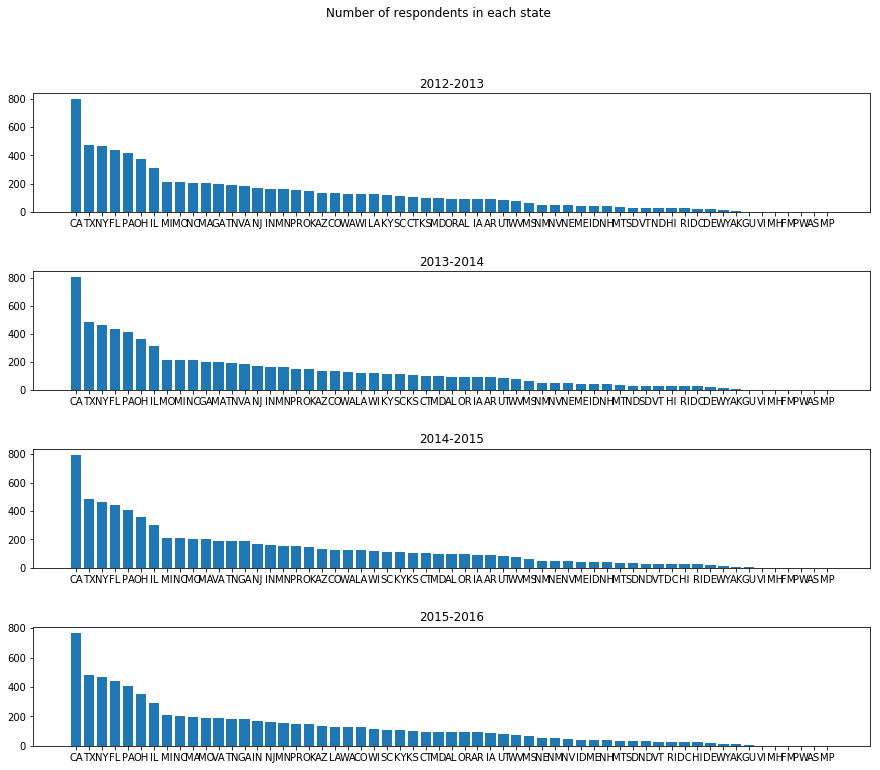

In [25]:
fig, axs = plt.subplots(4, figsize=(15,12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Number of respondents in each state')
axs[0].bar(df_12val.index, df_12val.values)
axs[0].set_title('2012-2013')
axs[1].bar(df_13val.index, df_13val.values)
axs[1].set_title('2013-2014')
axs[2].bar(df_14val.index, df_14val.values)
axs[2].set_title('2014-2015')
axs[3].bar(df_15val.index, df_15val.values)
axs[3].set_title('2015-2016')

In [26]:
# Drop the states that are less than 100 respondents
df_12val = df_12val[df_12val.apply(lambda val: val>100)]
df_13val = df_13val[df_13val.apply(lambda val: val>100)]
df_14val = df_14val[df_14val.apply(lambda val: val>100)]
df_15val = df_15val[df_15val.apply(lambda val: val>100)]

In [27]:
print(df_12val.index, 'number of states: ', len(df_12val))
print("-"*60)
print(df_13val.index, 'number of states: ', len(df_13val))
print("-"*60)
print(df_14val.index, 'number of states: ', len(df_14val))
print("-"*60)
print(df_15val.index, 'number of states: ', len(df_15val))

Index(['CA', 'TX', 'NY', 'FL', 'PA', 'OH', 'IL', 'MI', 'MO', 'NC', 'MA', 'GA',
       'TN', 'VA', 'NJ', 'IN', 'MN', 'PR', 'OK', 'AZ', 'CO', 'WA', 'WI', 'LA',
       'KY', 'SC', 'CT', 'KS'],
      dtype='object') number of states:  28
------------------------------------------------------------
Index(['CA', 'TX', 'NY', 'FL', 'PA', 'OH', 'IL', 'MO', 'MI', 'NC', 'GA', 'MA',
       'TN', 'VA', 'NJ', 'IN', 'MN', 'PR', 'OK', 'AZ', 'CO', 'WA', 'LA', 'WI',
       'KY', 'SC', 'KS', 'CT', 'MD'],
      dtype='object') number of states:  29
------------------------------------------------------------
Index(['CA', 'TX', 'NY', 'FL', 'PA', 'OH', 'IL', 'MI', 'NC', 'MO', 'MA', 'VA',
       'TN', 'GA', 'NJ', 'IN', 'MN', 'PR', 'OK', 'AZ', 'CO', 'WA', 'LA', 'WI',
       'SC', 'KY', 'KS', 'CT', 'MD'],
      dtype='object') number of states:  29
------------------------------------------------------------
Index(['CA', 'TX', 'NY', 'FL', 'PA', 'OH', 'IL', 'MI', 'NC', 'MA', 'MO', 'VA',
       'TN', 'GA', 'IN',

Text(0.5,1,'2015-2016')

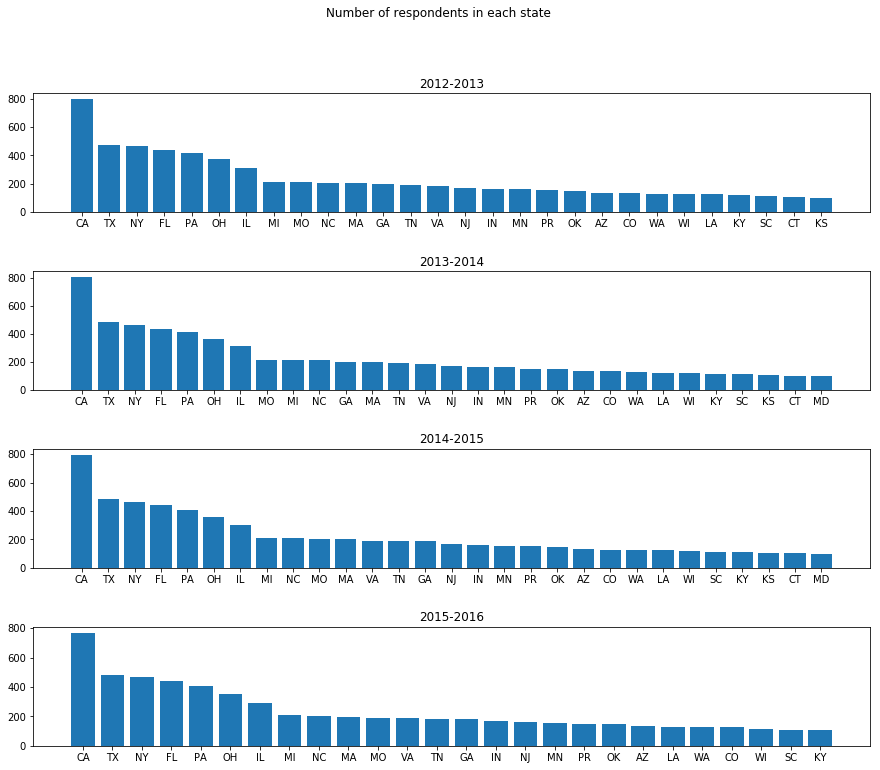

In [28]:
# Graphs of states with more than 100 respondents
fig, axs = plt.subplots(4, figsize=(15,12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Number of respondents in each state')
axs[0].bar(df_12val.index, df_12val.values)
axs[0].set_title('2012-2013')
axs[1].bar(df_13val.index, df_13val.values)
axs[1].set_title('2013-2014')
axs[2].bar(df_14val.index, df_14val.values)
axs[2].set_title('2014-2015')
axs[3].bar(df_15val.index, df_15val.values)
axs[3].set_title('2015-2016')

### Take 70% of sample from each dataset

In [94]:
# Not yet

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,35010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100812,100800,1008,Athens State University,Athens,AL,35611,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100858,100900,1009,Auburn University,Auburn,AL,36849,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
